## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
mouse_results_df["Mouse ID"].nunique()

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_group_df = mouse_results_df.groupby(["Mouse ID", "Timepoint"]).count()
mouse_group_df.loc[mouse_group_df["Drug Regimen"]>1, :]

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results_df.loc[mouse_results_df["Mouse ID"]=="g989", :]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexes_to_drop = mouse_results_df[mouse_results_df["Mouse ID"]=="g989"].index

mouse_results_df.drop(indexes_to_drop, inplace=True)

In [50]:
# Checking the number of mice in the clean DataFrame.
mouse_results_df["Mouse ID"].nunique()

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_group = mouse_results_df.groupby(["Drug Regimen"])


#Find the mean tumor volume for each regimen
mouse_mean_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].mean())
mouse_mean_df = mouse_mean_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Mean"})
mouse_mean_df = mouse_mean_df.reset_index()

#Find the median tumor volume for each regimen
mouse_median_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].median())
mouse_median_df = mouse_median_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume Median"})
mouse_median_df = mouse_median_df.reset_index()

#Find the variance tumor volume for each regimen
mouse_variance_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].var())
mouse_variance_df = mouse_variance_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
mouse_variance_df = mouse_variance_df.reset_index()

#Find the standard deviation tumor volume for regimen
mouse_stdev_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].std())
mouse_stdev_df = mouse_stdev_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"})
mouse_stdev_df = mouse_stdev_df.reset_index()


#Find the SEM tumor volume for each regimen
mouse_sem_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].sem())
mouse_sem_df = mouse_sem_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM"})
mouse_sem_df = mouse_sem_df.reset_index()

summary_df = mouse_mean_df.merge(mouse_median_df, how="outer", on="Drug Regimen")
summary_df = summary_df.merge(mouse_variance_df, how="outer", on="Drug Regimen")
summary_df = summary_df.merge(mouse_stdev_df, how="outer", on="Drug Regimen")
summary_df = summary_df.merge(mouse_sem_df, how="outer", on="Drug Regimen")


summary_df = summary_df.set_index("Drug Regimen")
summary_df

,Tumor Volume Mean,Median Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

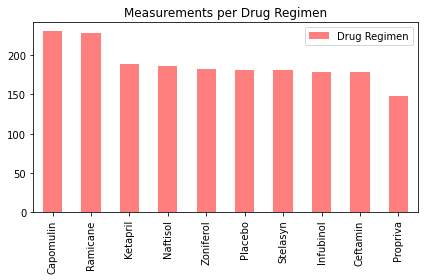

In [80]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts_df = pd.DataFrame(mouse_results_df["Drug Regimen"].value_counts())

drug_counts_df.plot(kind="bar", color="r", alpha=0.5, align="center")

plt.title("Measurements per Drug Regimen")
plt.tight_layout()
plt.show()

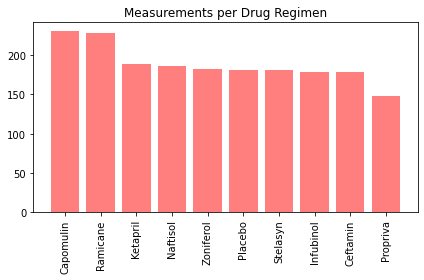

In [88]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = drug_counts_df.index

plt.bar(x_axis, drug_counts_df["Drug Regimen"], color="r", alpha=0.5, align = "center")

plt.title("Measurements per Drug Regimen")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

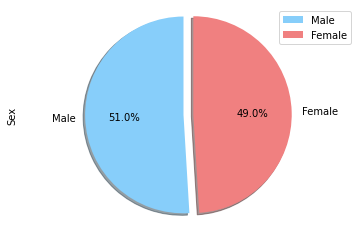

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(mouse_results_df["Sex"].value_counts())
colors = ["lightskyblue", "lightcoral"]
explode = (0.1, 0)

gender_df.plot(kind="pie", y="Sex", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

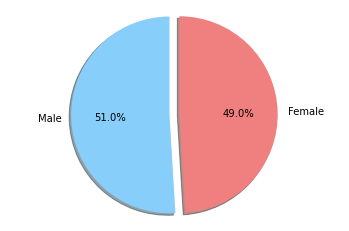

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index
counts = gender_df["Sex"]

plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_results_df = mouse_results_df.loc[(mouse_results_df["Drug Regimen"]=="Capomulin") 
                                          | (mouse_results_df["Drug Regimen"]=="Ramicane")
                                          | (mouse_results_df["Drug Regimen"]=="Infubinol")
                                          | (mouse_results_df["Drug Regimen"]=="Ceftamin")
                                          ,:]

# Start by getting the last (greatest) timepoint for each mouse
regimen_group = regimen_results_df.groupby(["Mouse ID"])
regimen_group_df = pd.DataFrame(regimen_group["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimen_results_df = regimen_results_df.merge(regimen_group_df, how="inner", on=["Mouse ID", "Timepoint"])

regimen_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


Ramicane
31.56046955
40.65900627
9.098536719999998

17.912664470000003
54.30681135



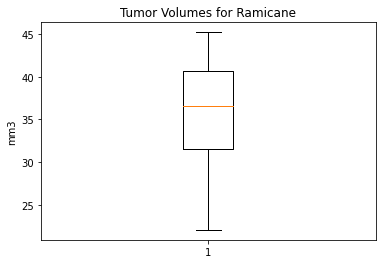

Capomulin
32.37735684
40.1592203
7.781863460000004

20.70456164999999
51.83201549



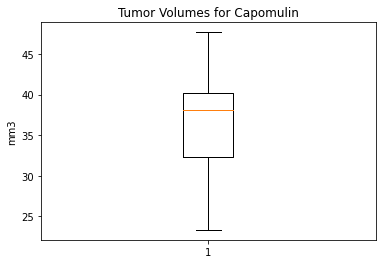

Infubinol
54.04860769
65.52574285
11.477135160000003

36.83290494999999
82.74144559000001



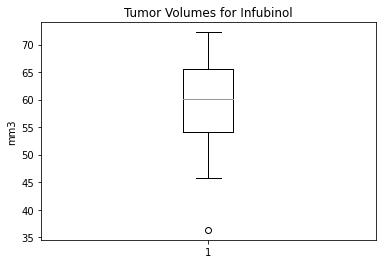

Ceftamin
48.72207785
64.29983003
15.577752179999997

25.355449580000002
87.66645829999999



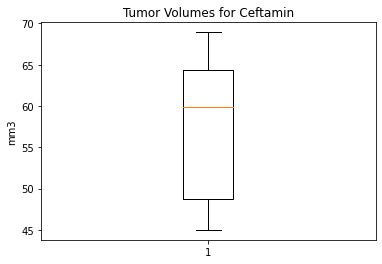

In [174]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = regimen_results_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    print(treatment)
    treatment_df = regimen_results_df.loc[regimen_results_df["Drug Regimen"]==treatment, :]
    tumor_volume = treatment_df["Tumor Volume (mm3)"]
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(lowerq)
    print(upperq)
    print(iqr)
    print()
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(lower_bound)
    print(upper_bound)
    print()
    
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Tumor Volumes for {treatment}')
    ax1.set_ylabel('mm3')
    ax1.boxplot(tumor_volume)
    plt.show()
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
